In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append('../src') 

from utils.data_loader import load_data

In [16]:
credit_data= load_data('../data/raw/creditcard.csv')

Data loaded successfully from ../data/raw/creditcard.csv


In [17]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

2. Handle Missing Values

In [18]:
credit_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

3. Data Cleaning

Remove duplicates

In [19]:
# Check for duplicate rows
print(f"Initial shape: {credit_data.shape}")

# Find all duplicate rows (keeping all occurrences)
duplicates = credit_data[credit_data.duplicated(keep=False)]

# Sort the duplicates to see them grouped together
duplicates_sorted = duplicates.sort_values(by=list(credit_data.columns))

print(f"\nDuplicates Sorted: {duplicates_sorted}")
# Display the duplicates
print(f"\nNumber of duplicate rows (including originals): {len(duplicates)}")

# Count of fully duplicated rows (where keep='first' would remove)
duplicate_count = len(credit_data) - len(credit_data.drop_duplicates())
print(f"\nNumber of rows that would be dropped by drop_duplicates(): {duplicate_count}")


Initial shape: (284807, 31)

Duplicates Sorted:             Time        V1        V2        V3        V4        V5        V6  \
34          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
112         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284192  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   
284190  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.10

In [20]:
credit_data.drop_duplicates(inplace=True)

2. Class Distribution (Univariate Analysis)

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


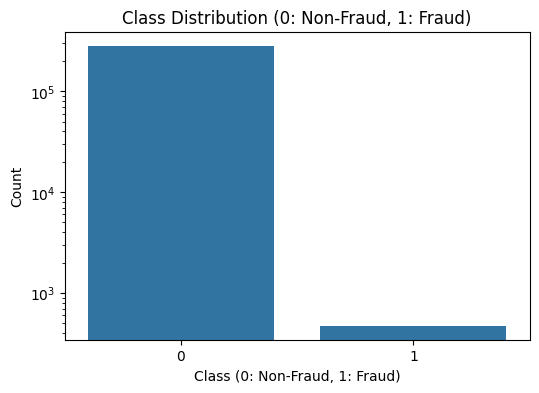

In [21]:
# Class distribution 
print(credit_data['Class'].value_counts(normalize=True))

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=credit_data)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.yscale('log')  # Use log scale due to severe imbalance
plt.show()

Handle Class Imbalance

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = credit_data.drop(columns=['Class'])
y = credit_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train_smote).value_counts(normalize=True))

Class
0    0.5
1    0.5
Name: proportion, dtype: float64


3. Univariate Analysis of Numerical Features

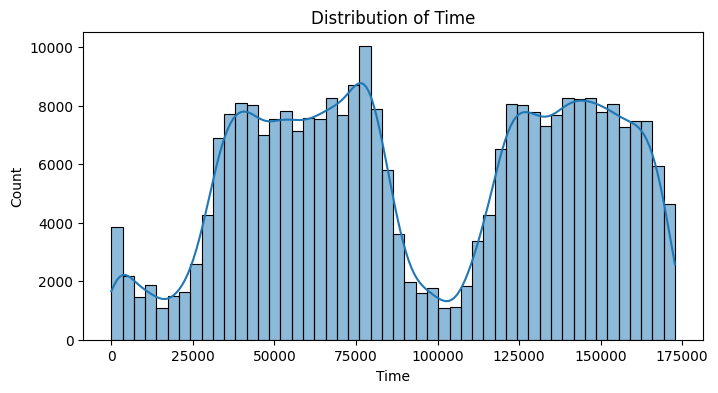

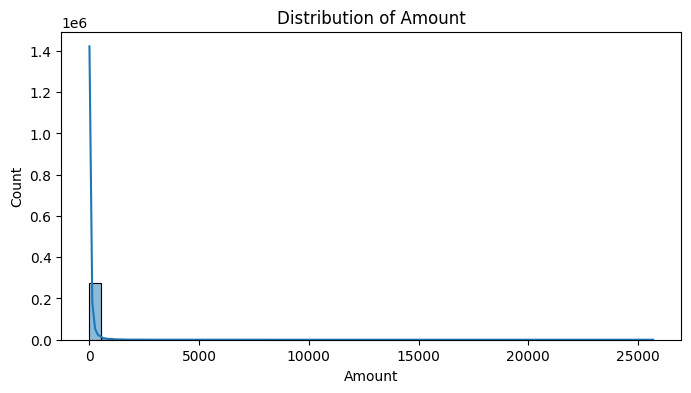

                Time         Amount
count  283726.000000  283726.000000
mean    94811.077600      88.472687
std     47481.047891     250.399437
min         0.000000       0.000000
25%     54204.750000       5.600000
50%     84692.500000      22.000000
75%    139298.000000      77.510000
max    172792.000000   25691.160000


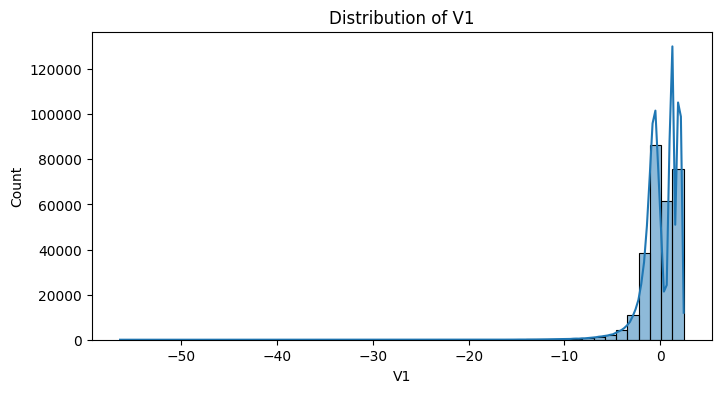

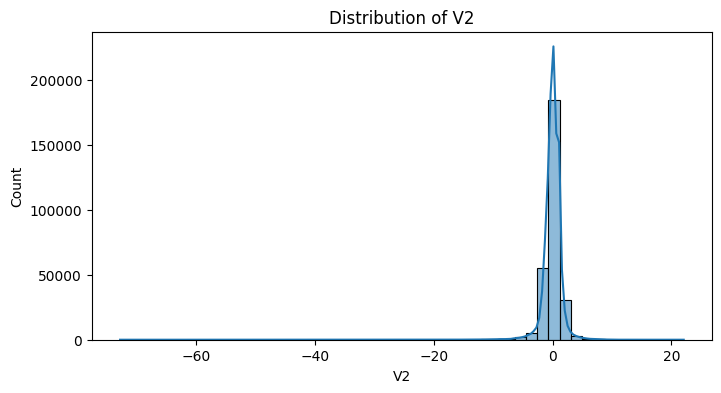

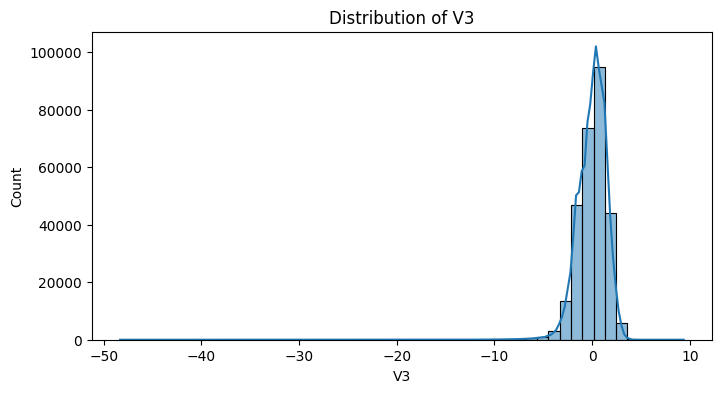

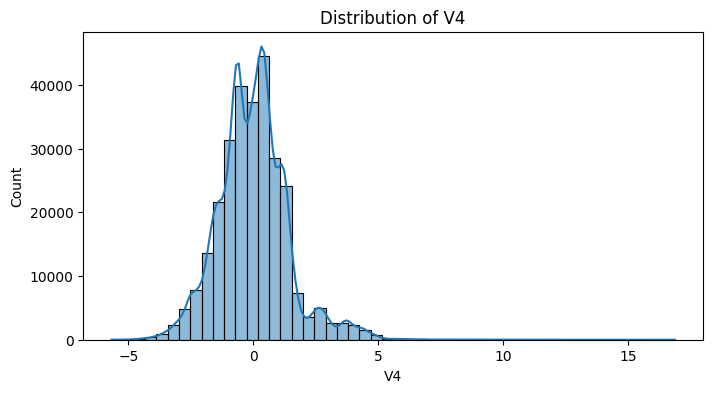

In [23]:
# Distribution of Time and Amount
for col in ['Time', 'Amount']:
    plt.figure(figsize=(8, 4))
    sns.histplot(credit_data[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Summary statistics
print(credit_data[['Time', 'Amount']].describe())

# Sample V1-V28 distributions (select a few due to high number)
sample_cols = ['V1', 'V2', 'V3', 'V4']
for col in sample_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(credit_data[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

4. Bivariate Analysis: Features vs. Class

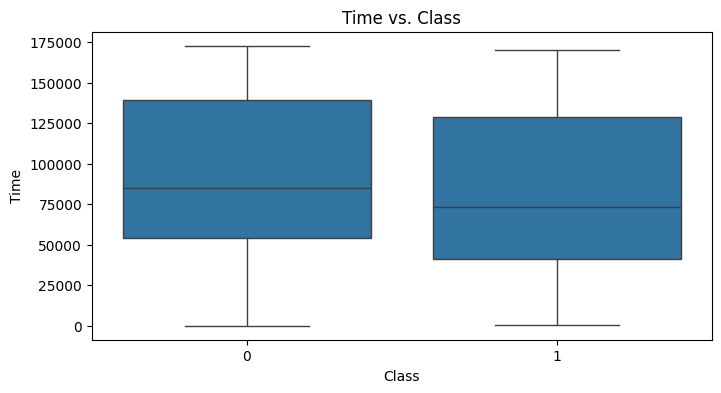

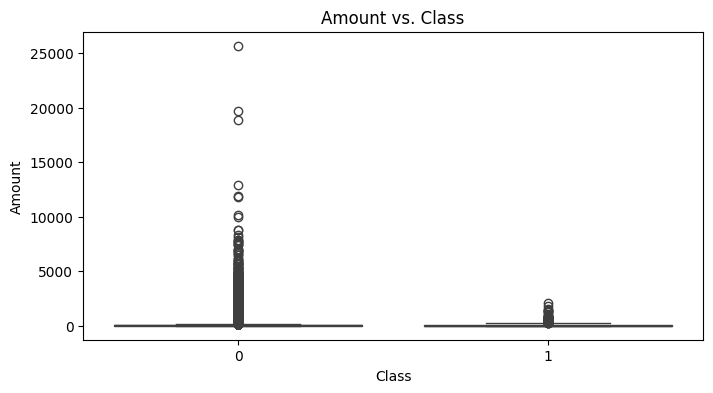

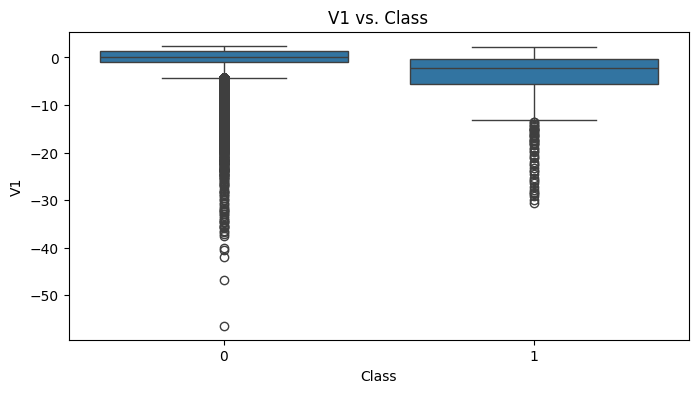

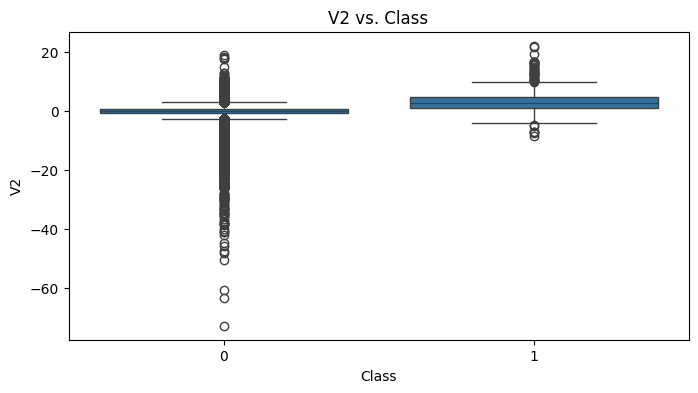

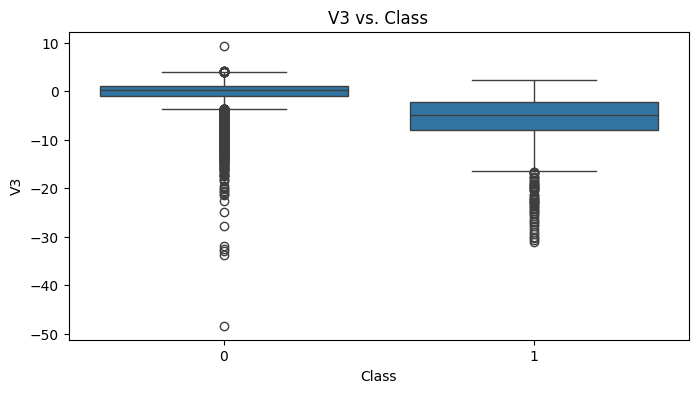

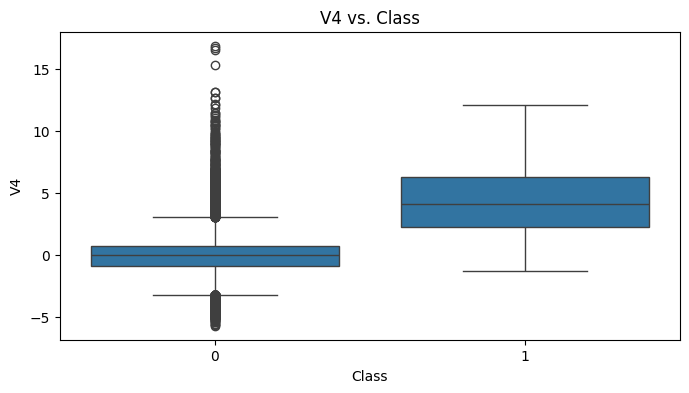

In [24]:
# Boxplots for Time and Amount vs. Class
for col in ['Time', 'Amount']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y=col, data=credit_data)
    plt.title(f'{col} vs. Class')
    plt.show()

# Boxplots for sample V1-V28 features
for col in sample_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y=col, data=credit_data)
    plt.title(f'{col} vs. Class')
    plt.show()

5. Correlation Analysis

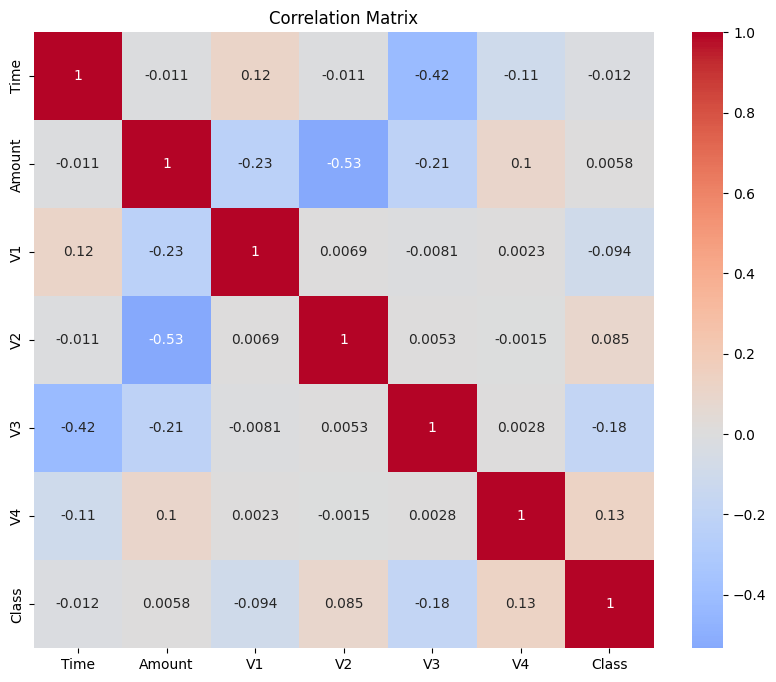

In [25]:
# Correlation matrix for a subset of features
subset_cols = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'Class']
corr = credit_data[subset_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

6. Time-Based Patterns

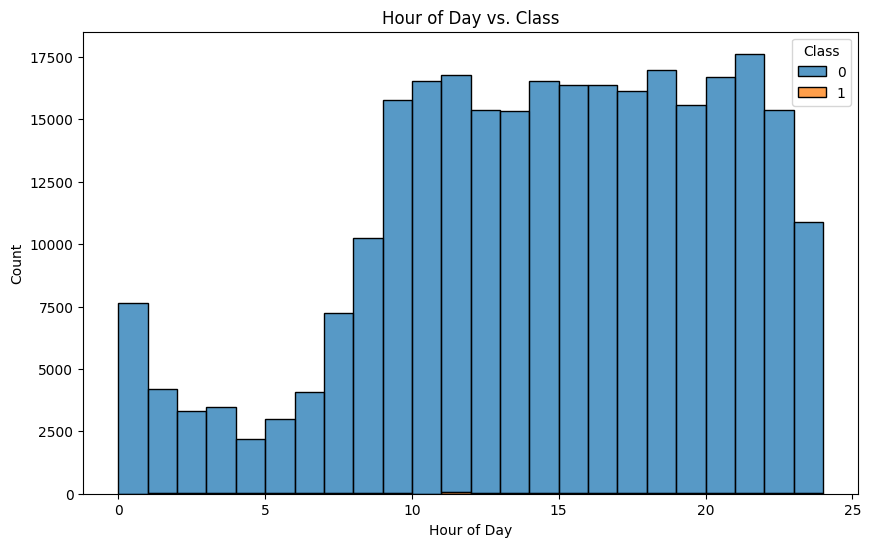

In [26]:
# Convert Time to hours
credit_data['hour_of_day'] = (credit_data['Time'] / 3600) % 24

# Plot hour_of_day vs. Class
plt.figure(figsize=(10, 6))
sns.histplot(data=credit_data, x='hour_of_day', hue='Class', bins=24, multiple='stack')
plt.title('Hour of Day vs. Class')
plt.xlabel('Hour of Day')
plt.show()

7. Outlier Detection

Number of Amount outliers (|z|>3): 4063
Class
0    0.997293
1    0.002707
Name: proportion, dtype: float64


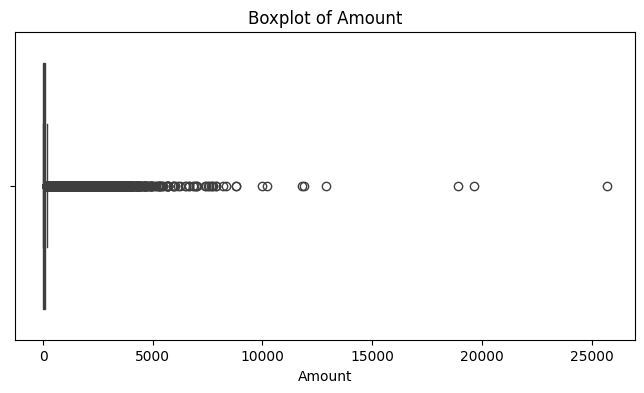

In [27]:
# Z-score for Amount to detect outliers
from scipy.stats import zscore
credit_data['Amount_zscore'] = zscore(credit_data['Amount'])
outliers = credit_data[abs(credit_data['Amount_zscore']) > 3]
print(f"Number of Amount outliers (|z|>3): {len(outliers)}")
print(outliers['Class'].value_counts(normalize=True))

# Boxplot for Amount to visualize outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=credit_data['Amount'])
plt.title('Boxplot of Amount')
plt.show()

8. Class Imbalance and Sampling Considerations

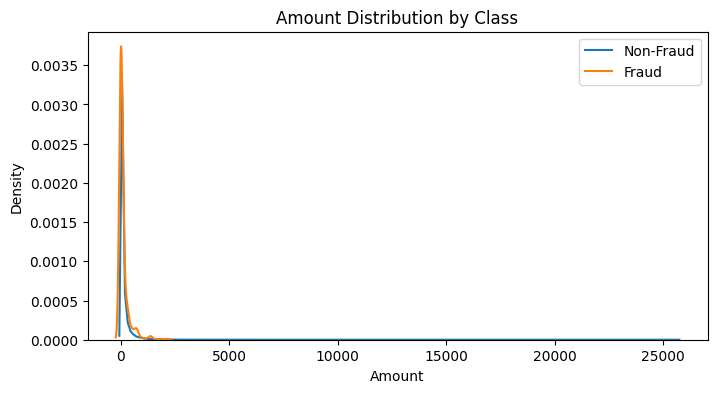

In [28]:
# Compare Amount distribution for each class
plt.figure(figsize=(8, 4))
sns.kdeplot(data=credit_data[credit_data['Class'] == 0]['Amount'], label='Non-Fraud')
sns.kdeplot(data=credit_data[credit_data['Class'] == 1]['Amount'], label='Fraud')
plt.title('Amount Distribution by Class')
plt.legend()
plt.show()

In [29]:
# Save the processed data
credit_data.to_csv('../data/processed/creditcard_processed.csv', index=False)